In [2]:
import numpy as np
import scipy.stats
import pylab as plt
from scipy.optimize import curve_fit
plt.rcParams['figure.figsize'] = [8, 8]

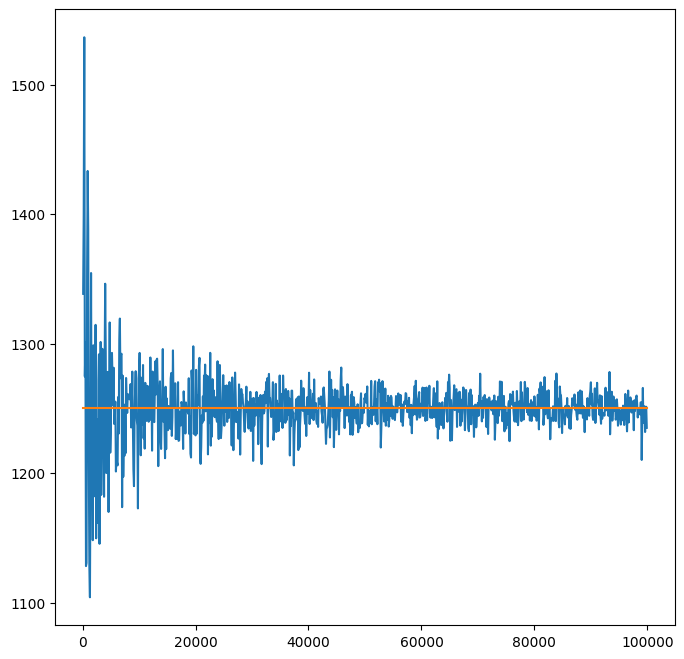

In [6]:
s = 5
distG = scipy.stats.halfnorm(loc =0 , scale=s)
sample = np.arange(100,100000,100)                   #increasing number of samples
integral = np.zeros(shape = len(sample))
true_value = np.zeros(shape = len(sample))

def f(x,s):                                       #analytic solution
        return x ** 3 * np.sqrt(np.pi/2) * s

for N,i in zip (rep, range(len(sample))):
    x = distG.rvs(N)
    integral[i] = np.mean(f(x,s))
    true_value[i] = 2*s**4                        #expected value
    
plt.plot(sample, integral)
plt.plot(sample, true_value)

The result converges to the expected value with the number of samples

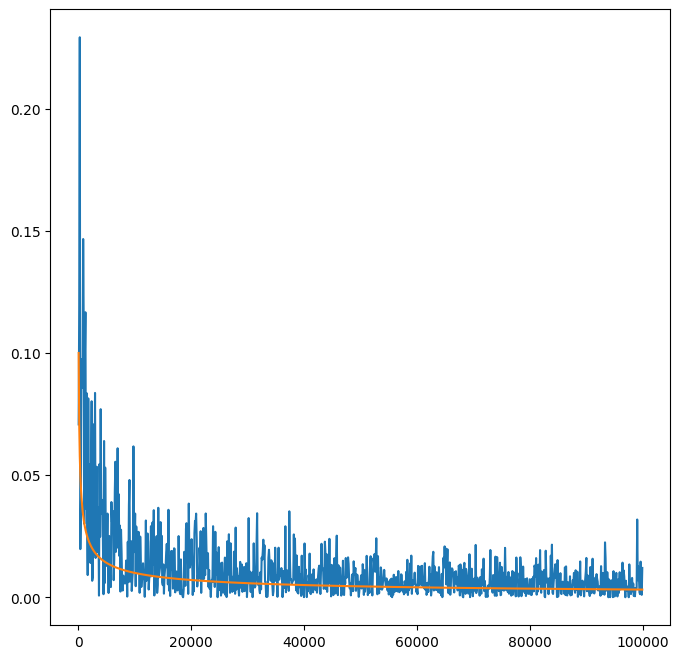

In [11]:
plt.plot(sample, abs(integral - true_value)/true_value)
plt.plot(sample, sample**(-1/2))
#plt.loglog()

The error goes down as $1/\sqrt N$ as expected.

1249.7321975601178 27.70071233187614


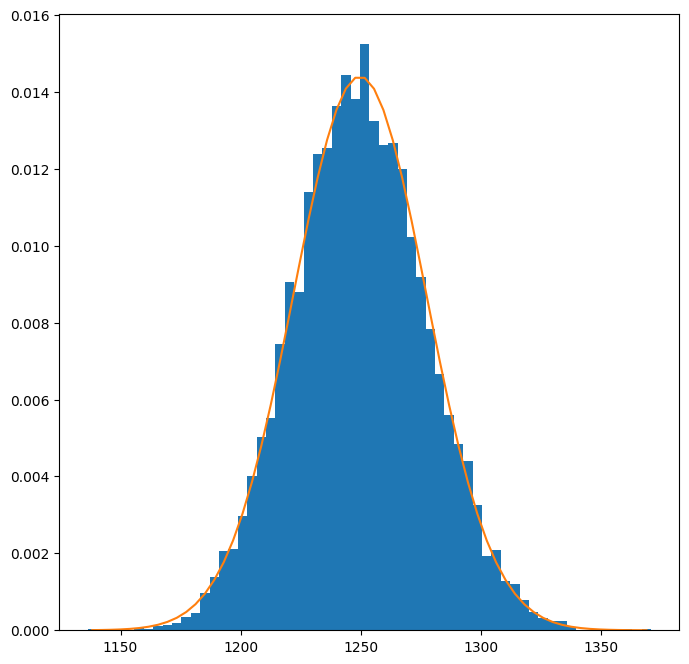

In [15]:
N = 10000

result = np.zeros(shape = N)
asc = np.zeros(shape = 60)

for i in range(N):                                 #distribution of the integral values
    x = distG.rvs(N)
    result[i] = np.mean(f(x,s))
counts, bins, bars = plt.hist(result, bins=60, density = True)

for i in range(60):
    asc[i] = (bins[i]+bins[i+1])/2

distribution = scipy.stats.norm(loc=np.mean(result),scale=np.std(result))

print(np.mean(result), np.std(result))
plt.plot(asc, distribution.pdf(asc))

As number of samples imcrease, they became normally distributed.